In [1]:
print('25 paskaita')

25 paskaita


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [29]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [4]:
from dateutil import parser
from manoFunkcijos import pout

In [ ]:
# 1) su plot() nubraižykite BrentOilPrices istorinius duomenis.
# Duomenis imkite iš SQL lentelės 
# BrentOilPrices.
# 2) Pridėkite vartotojo įvestį, kad su input() 
# būtų galima nurodyti metus (nuo, iki), kurių istorinius 
# duomenis norite pamatyti.

In [5]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select * from BrentOilPrices"""
C.execute(sql)
ans = C.fetchall()
d, p = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)


Rodoma 5 eilutės iš 8360
| 0 |  20-May-87   |    18.63     |
| 1 |  21-May-87   |    18.45     |
| 2 |  22-May-87   |    18.55     |
| 3 |  25-May-87   |     18.6     |
| 4 |  26-May-87   |    18.63     |


In [6]:
d = list(map(lambda x: parser.parse(x), d))

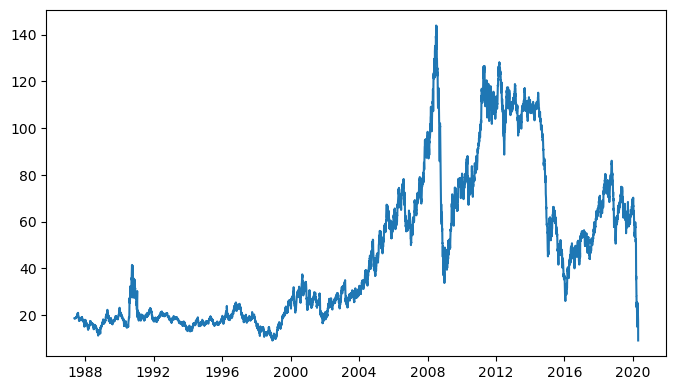

In [7]:
fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
axis.plot(d,p)

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
# fig.tight_layout()
plt.show()

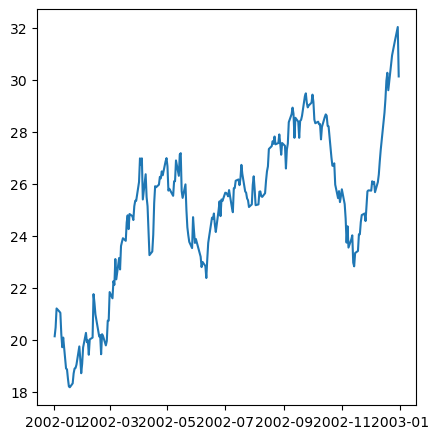

In [11]:
nuo = int(input('Nuo?(tik metai)')[0:4])
iki = int(input('Iki?(tik metai)')[0:4])

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select * from BrentOilPrices
"""
C.execute(sql)
ans = C.fetchall()
d, p = list(map(list, zip(*ans)))
#? = np.transpose(ans)
d = list(map(lambda x: parser.parse(x), d))
# filtravimas:
df, pf = [],[]
for di, pi in zip(d,p):
    if nuo <= di.year < iki:
        df.append(di)
        pf.append(pi)

fig, axis = plt.subplots(figsize=(4.5,4.5))
#plotting code:

axis.plot(df,pf)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [12]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select Date, Price, str_to_date(Date, '%d-%b-%y')
as DATA
from BrentOilPrices limit 10;"""
C.execute(sql)
ans = C.fetchall()
d, p, t = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

Rodoma 5 eilutės iš 10
| 0 |  20-May-87   |    18.63     |  1987-05-20  |
| 1 |  21-May-87   |    18.45     |  1987-05-21  |
| 2 |  22-May-87   |    18.55     |  1987-05-22  |
| 3 |  25-May-87   |     18.6     |  1987-05-25  |
| 4 |  26-May-87   |    18.63     |  1987-05-26  |


In [13]:
#sql užklausos vykdymas per mysql/mariadb kursorių
nuo= parser.parse(input('nuo?'))
iki = parser.parse(input('Iki?'))
sql="""select Date, Price, str_to_date(Date, '%d-%b-%y')
as DATA
from BrentOilPrices
where str_to_date(Date, '%d-%b-%y')
between %s and %s;"""
C.execute(sql, (nuo, iki))
ans = C.fetchall()
_ = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

Rodoma 5 eilutės iš 259
| 0 |  22-Aug-02   |    27.81     |  2002-08-22  |
| 1 |  23-Aug-02   |    27.51     |  2002-08-23  |
| 2 |  26-Aug-02   |    27.56     |  2002-08-26  |
| 3 |  27-Aug-02   |    27.89     |  2002-08-27  |
| 4 |  28-Aug-02   |    27.54     |  2002-08-28  |


In [ ]:
# EismoĮvykiai - kurį mėnesį įvyko daugiausiai eismo įvykių? 
# Pateikite eismo įvykių kiekius su bar arba barh.
# kuriomis valandomis? Taip pat vizualizuokite tai su bar 
# arba barh. Stulpelis dataLaikas, 2021 metai.

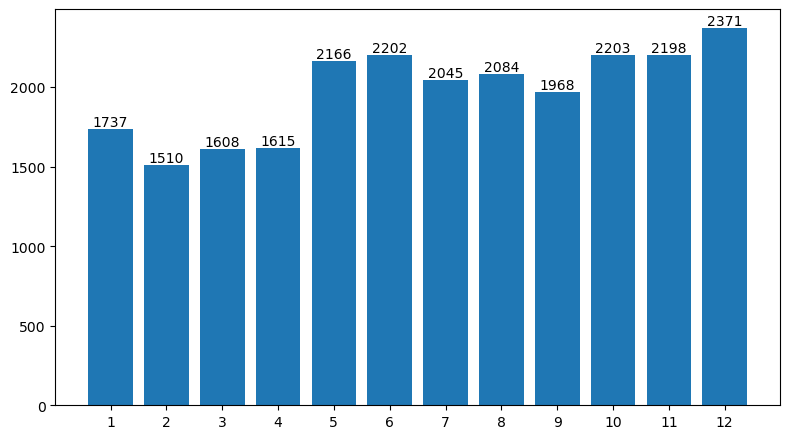

In [16]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select month(cast(dataLaikas as date)) as M, count(*) as CC
from EismIvyk2021
group by month(cast(dataLaikas as date));"""
C.execute(sql)
ans = C.fetchall()
m,cc = list(map(list, zip(*ans)))
#? = np.transpose(ans)

fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
p = axis.bar(m, cc)
axis.set_xticks(m)
axis.bar_label(p)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

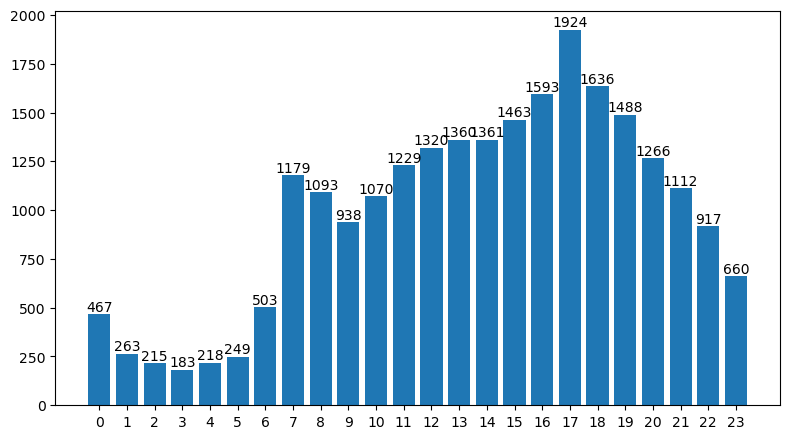

In [17]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select hour(cast(dataLaikas as datetime)) as M, count(*) as CC
from EismIvyk2021
group by hour(cast(dataLaikas as datetime));"""
C.execute(sql)
ans = C.fetchall()
m,cc = list(map(list, zip(*ans)))
#? = np.transpose(ans)

fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
p = axis.bar(m, cc)
axis.set_xticks(m)
axis.bar_label(p)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

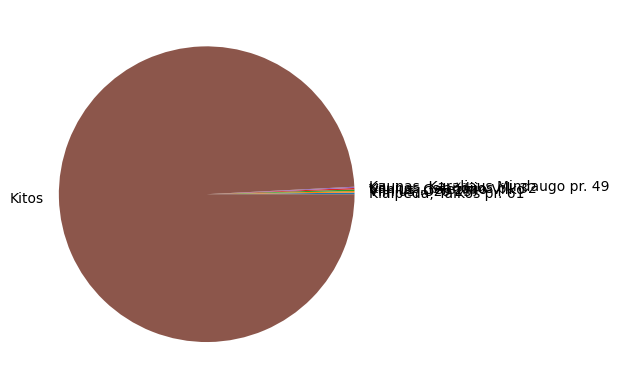

In [23]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with t1 as
(select ivykioVieta, count(*) as c from EismIvyk2021 group by ivykioVieta
order by c desc limit 5)
select * from t1
union all
select 'Kitos', count(*)
from EismIvyk2021
where ivykioVieta not in (select ivykioVieta from
(select ivykioVieta, count(*) as c from EismIvyk2021 group by ivykioVieta
order by c desc limit 5) as tt
);"""
C.execute(sql)
ans = C.fetchall()
v, c = list(map(list, zip(*ans)))
#? = np.transpose(ans)

plt.pie(c, labels=v)
plt.show()

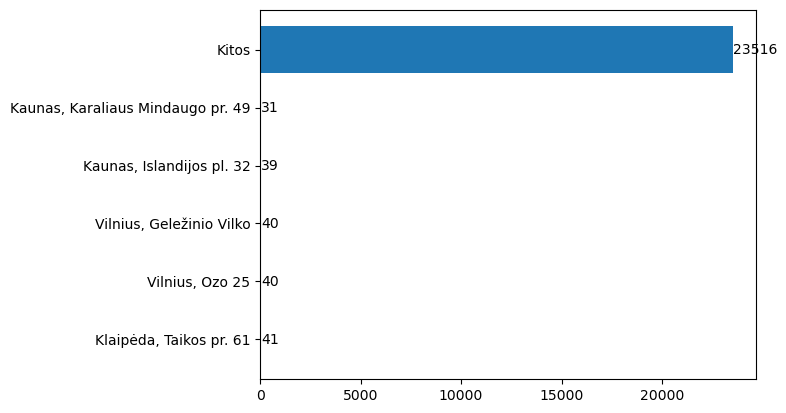

In [26]:
p = plt.barh(v,c)
plt.bar_label(p)
plt.show()

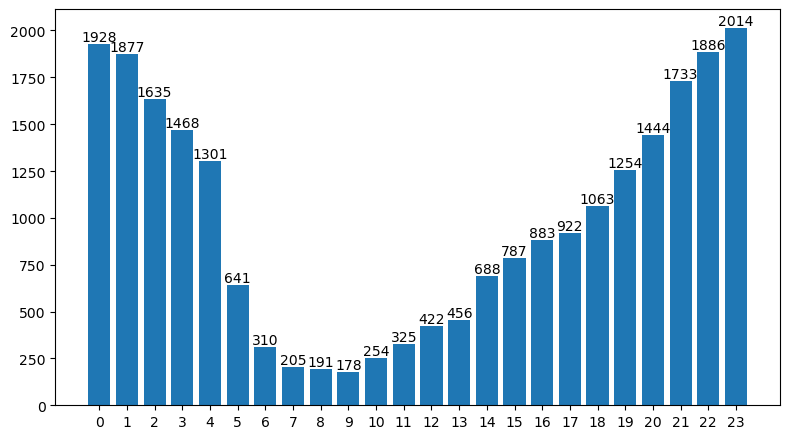

In [36]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select H, c0, c1, c1/c0*100 as p from
(select H, count(*) as C0 from
(select hour(cast(OCCUR_TIME as time)) as H, BORO, STATISTICAL_MURDER_FLAG from nypd)
as ttn
group by H) as th1
join
(select H, count(*) as C1 from
(select hour(cast(OCCUR_TIME as time)) as H, BORO, STATISTICAL_MURDER_FLAG from nypd)
as ttn
where STATISTICAL_MURDER_FLAG = 1
group by H) as th2
using (H);"""
C.execute(sql)
ans = C.fetchall()
h, c0, c1, prc = list(map(list, zip(*ans)))
#? = np.transpose(ans)


fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
p = axis.bar(h, c0)
axis.bar_label(p)
axis.set_xticks(h)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

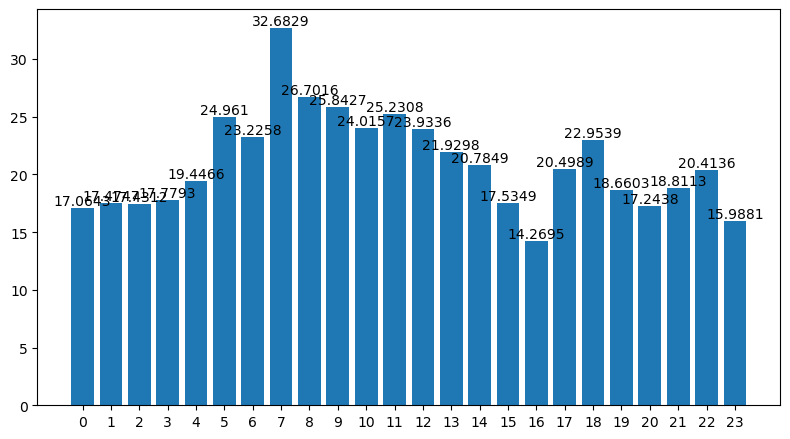

In [37]:
fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
p = axis.bar(h, prc)
axis.set_xticks(h)
axis.bar_label(p)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()